Data Preprocessing

In [ ]:
import pandas as pd
ibm = pd.read_csv('IBM_data.csv', index_col=0)
ibm

,close,treasury_yield,^SP500-45,interest_rate
1999-11-01,96.75,5.16,605.730713,5.38
1999-11-02,94.81,5.14,605.990723,5.18
1999-11-03,94.37,5.12,615.300232,5.21
1999-11-04,91.56,5.10,621.889954,5.27
1999-11-05,90.25,5.14,629.349609,5.14
...,...,...,...,...
2024-10-27,NaN,NaN,NaN,4.83
2024-10-28,212.91,4.7,4531.649902,4.83
2024-10-29,210.43,4.7,4582.229980,4.83
2024-10-30,204.90,4.67,4520.939941,4.83


In [ ]:
# check num
nan_summary = ibm.isna().sum()
data_description = ibm.describe(include='all')
nan_summary, data_description

(close             2841
 treasury_yield    2608
 ^SP500-45         2846
 interest_rate        0
 dtype: int64,
               close treasury_yield    ^SP500-45  interest_rate
 count   6291.000000           6524  6286.000000    9132.000000
 unique          NaN            620          NaN            NaN
 top             NaN              .          NaN            NaN
 freq            NaN            269          NaN            NaN
 mean     131.843785            NaN   969.293597       1.925161
 std       36.459989            NaN   953.435191       2.030344
 min       55.070000            NaN   172.880005       0.040000
 25%      101.675000            NaN   346.052505       0.140000
 50%      129.000000            NaN   510.345001       1.170000
 75%      156.315000            NaN  1204.584961       3.502500
 max      235.260000            NaN  4616.319824       7.030000)

In [ ]:

ibm['treasury_yield'] = ibm['treasury_yield'].replace('.', pd.NA)
ibm['treasury_yield'] = pd.to_numeric(ibm['treasury_yield'], errors='coerce')
ibm['^SP500-45'] = pd.to_numeric(ibm['^SP500-45'], errors='coerce')

ibm['close'] = ibm['close'].interpolate(method='linear')
ibm['treasury_yield'] = ibm['treasury_yield'].interpolate(method='linear')
ibm['^SP500-45'] = ibm['^SP500-45'].interpolate(method='linear')
ibm['interest_rate'] = ibm['interest_rate'].interpolate(method='linear')

ibm_cleaned = ibm.copy()

nan_summary_after_interpolation = ibm.isna().sum()
nan_summary_after_interpolation

,0
close,0
treasury_yield,0
^SP500-45,0
interest_rate,0


In [ ]:
ibm_cleaned = ibm_cleaned.reset_index()
ibm_cleaned = ibm_cleaned.rename(columns={'index': 'date'})
print(ibm_cleaned.head())
ibm_cleaned.to_csv('ibm_cleaned.csv', index=False)

         date  close  treasury_yield   ^SP500-45  interest_rate
0  1999-11-01  96.75            5.16  605.730713           5.38
1  1999-11-02  94.81            5.14  605.990723           5.18
2  1999-11-03  94.37            5.12  615.300232           5.21
3  1999-11-04  91.56            5.10  621.889954           5.27
4  1999-11-05  90.25            5.14  629.349609           5.14


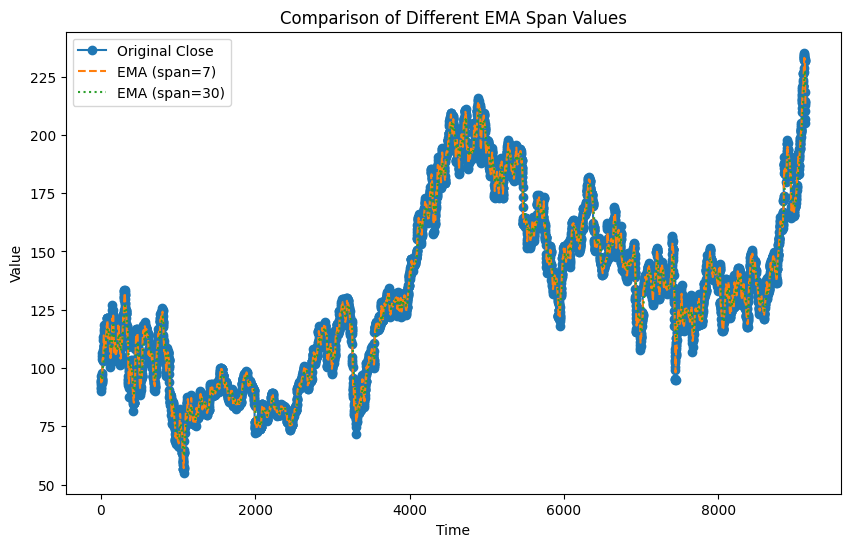

In [ ]:

df = ibm_cleaned.copy()
df['EMA_7'] = df['close'].ewm(span=7, adjust=False).mean()
df['EMA_30'] = df['close'].ewm(span=30, adjust=False).mean()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Original Close', marker='o')
plt.plot(df['EMA_7'], label='EMA (span=7)', linestyle='--')
plt.plot(df['EMA_30'], label='EMA (span=30)', linestyle=':')
plt.legend()
plt.title('Comparison of Different EMA Span Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
ibm_cleaned

,date,close,treasury_yield,^SP500-45,interest_rate
0,1999-11-01,96.750000,5.16,605.730713,5.38
1,1999-11-02,94.810000,5.14,605.990723,5.18
2,1999-11-03,94.370000,5.12,615.300232,5.21
3,1999-11-04,91.560000,5.10,621.889954,5.27
4,1999-11-05,90.250000,5.14,629.349609,5.14
...,...,...,...,...,...
9127,2024-10-27,213.496667,4.71,4532.736654,4.83
9128,2024-10-28,212.910000,4.70,4531.649902,4.83
9129,2024-10-29,210.430000,4.70,4582.229980,4.83
9130,2024-10-30,204.900000,4.67,4520.939941,4.83


# LSTM

In [ ]:
ibm_cleaned

,date,close,treasury_yield,^SP500-45,interest_rate
0,1999-11-01,96.750000,5.16,605.730713,5.38
1,1999-11-02,94.810000,5.14,605.990723,5.18
2,1999-11-03,94.370000,5.12,615.300232,5.21
3,1999-11-04,91.560000,5.10,621.889954,5.27
4,1999-11-05,90.250000,5.14,629.349609,5.14
...,...,...,...,...,...
9127,2024-10-27,213.496667,4.71,4532.736654,4.83
9128,2024-10-28,212.910000,4.70,4531.649902,4.83
9129,2024-10-29,210.430000,4.70,4582.229980,4.83
9130,2024-10-30,204.900000,4.67,4520.939941,4.83


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

selected_features = ['close', 'treasury_yield', '^SP500-45', 'interest_rate']
data = ibm_cleaned[selected_features]

train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

In [ ]:

scaler_close = MinMaxScaler()
train_close_scaled = scaler_close.fit_transform(train[['close']])
test_close_scaled = scaler_close.transform(test[['close']])

scaler_features = MinMaxScaler()
train_features_scaled = scaler_features.fit_transform(train[['treasury_yield', '^SP500-45', 'interest_rate']])
test_features_scaled = scaler_features.transform(test[['treasury_yield', '^SP500-45', 'interest_rate']])

train_scaled = train.copy()
test_scaled = test.copy()

train_scaled['close'] = train_close_scaled
test_scaled['close'] = test_close_scaled

train_scaled[['treasury_yield', '^SP500-45', 'interest_rate']] = train_features_scaled
test_scaled[['treasury_yield', '^SP500-45', 'interest_rate']] = test_features_scaled

In [ ]:

train_scaled['EMA_30'] = train_scaled['close'].ewm(span=30, adjust=False).mean()
train_scaled['EMA_7'] = train_scaled['close'].ewm(span=7, adjust=False).mean()

last_ema_30 = train_scaled['EMA_30'].iloc[-1]
last_ema_7 = train_scaled['EMA_7'].iloc[-1]

test_scaled['EMA_30'] = test_scaled['close'].ewm(span=30, adjust=False).mean().shift(1)
test_scaled['EMA_30'].iloc[0] = last_ema_30  # 初始化第一个 EMA 值

test_scaled['EMA_7'] = test_scaled['close'].ewm(span=7, adjust=False).mean().shift(1)
test_scaled['EMA_7'].iloc[0] = last_ema_7  # 初始化第一个 EMA 值

<ipython-input-9-187d6b84275d>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_scaled['EMA_30'].iloc[0] = last_ema_30  # 初始化第一个 EMA 值
<ipython-input-9-187d6b84275d>:14: FutureWarning: ChainedAssignmentError: behaviour will change in p

In [ ]:
test_scaled['MACD'] = test_scaled['EMA_7'] - test_scaled['EMA_30']  # MACD Line
train_scaled['MACD'] = train_scaled['EMA_7'] - train_scaled['EMA_30']

In [ ]:
train_scaled

,close,treasury_yield,^SP500-45,interest_rate,EMA_30,EMA_7,MACD
0,0.259317,0.803738,0.332773,0.763948,0.259317,0.259317,0.000000
1,0.247247,0.800623,0.332973,0.735336,0.258538,0.256299,-0.002239
2,0.244509,0.797508,0.340130,0.739628,0.257633,0.253352,-0.004281
3,0.227027,0.794393,0.345196,0.748212,0.255658,0.246771,-0.008888
4,0.218876,0.800623,0.350931,0.729614,0.253285,0.239797,-0.013488
...,...,...,...,...,...,...,...
7300,0.502229,0.257529,0.995285,0.256080,0.515792,0.498752,-0.017040
7301,0.503329,0.257009,1.000000,0.256080,0.514988,0.499896,-0.015092
7302,0.489952,0.253894,0.989591,0.254649,0.513373,0.497410,-0.015963
7303,0.498849,0.252336,0.996425,0.254649,0.512436,0.497770,-0.014666


In [ ]:
test_scaled

,close,treasury_yield,^SP500-45,interest_rate,EMA_30,EMA_7,MACD
7305,0.500591,0.236760,1.008803,0.218884,0.510949,0.495676,-0.015274
7306,0.505029,0.237279,1.010886,0.218884,0.500591,0.500591,0.000000
7307,0.509467,0.237799,1.012970,0.218884,0.500877,0.501701,0.000823
7308,0.513905,0.238318,1.015053,0.217454,0.501432,0.503642,0.002211
7309,0.515274,0.242991,1.013392,0.217454,0.502236,0.506208,0.003972
...,...,...,...,...,...,...,...
9127,0.985670,0.733645,3.351828,0.685265,1.059545,1.041808,-0.017737
9128,0.982020,0.732087,3.350992,0.685265,1.054779,1.027774,-0.027005
9129,0.966590,0.732087,3.389878,0.685265,1.050085,1.016335,-0.033750
9130,0.932184,0.727414,3.342759,0.685265,1.044698,1.003899,-0.040799


In [ ]:

data_final = pd.concat([train_scaled, test_scaled])

final_features = ['close', 'treasury_yield', '^SP500-45', 'interest_rate', 'EMA_30', 'EMA_7', 'MACD']
data_values = data_final[final_features].values


def create_dataset(data, time_steps, target_col_index):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i])
        y.append(data[i, target_col_index])
    return np.array(X), np.array(y)

target_col_index = final_features.index('close')
time_steps = 30

X, y = create_dataset(data_values, time_steps, target_col_index)

train_size = int(len(X) * 0.7)  # 70%
val_size = int(len(X) * 0.15)   # 15%
test_size = len(X) - train_size - val_size  # 15%

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")


X_train: (6371, 30, 7), X_val: (1365, 30, 7), X_test: (1366, 30, 7)
y_train: (6371,), y_val: (1365,), y_test: (1366,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
# first layer LSTM
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
# second LSTM
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
# third LSTM
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
# output
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 256)             │         272,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 518,977 (1.98 MB)

 Trainable params: 518,977 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0202 - val_loss: 0.0011
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0022 - val_loss: 9.5087e-04
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0019 - val_loss: 6.2233e-04
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0015 - val_loss: 6.2879e-04
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0016 - val_loss: 8.8264e-04
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0012 - val_loss: 7.9031e-04
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0013 - val_loss: 5.5658e-04
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0013 - val_loss: 3.9834e-04
Epoch 12/50


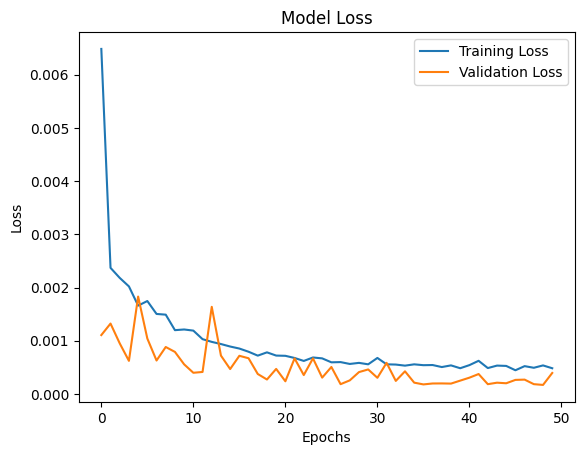

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
print("Predictions shape:", predictions.shape)
print("y_test shape:", y_test.shape)

Predictions shape: (1366, 1)
y_test shape: (1366,)


In [ ]:
predictions.shape

(1366, 1)

In [ ]:
# reverse the min_max
predictions_diff = scaler_close.inverse_transform(predictions)


In [ ]:
y_test_diff = scaler_close.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
predictions_diff

array([[124.53625],
       [125.33279],
       [126.26508],
       ...,
       [210.79077],
       [208.91179],
       [204.8829 ]], dtype=float32)

In [ ]:
y_test_diff

array([[121.02      ],
       [121.79      ],
       [122.39666667],
       ...,
       [210.43      ],
       [204.9       ],
       [206.72      ]])

In [ ]:
y_test #2019-11-04

array([0.41031544, 0.41510608, 0.41888052, ..., 0.96658993, 0.93218441,
       0.94350775])

In [ ]:
train_size = len(y_train)
orginal_index = train_size + time_steps

In [ ]:
orginal_index

6401

In [ ]:

last_known_price = ibm_cleaned['close'].iloc[orginal_index]
last_known_price

150.65

In [ ]:
dates = ibm_cleaned['date'].iloc[-len(y_test):]

In [ ]:
dates = pd.to_datetime(dates, errors='coerce')

In [ ]:
train_dates = ibm_cleaned[:orginal_index+1]['date']

In [ ]:
train_values = ibm_cleaned[:orginal_index+1]['close']

In [ ]:
train_dates = pd.to_datetime(train_dates, errors='coerce')

In [ ]:
dates

,date
7766,2021-02-04
7767,2021-02-05
7768,2021-02-06
7769,2021-02-07
7770,2021-02-08
...,...
9127,2024-10-27
9128,2024-10-28
9129,2024-10-29
9130,2024-10-30


In [ ]:
train_dates

,date
0,1999-11-01
1,1999-11-02
2,1999-11-03
3,1999-11-04
4,1999-11-05
...,...
6397,2017-05-07
6398,2017-05-08
6399,2017-05-09
6400,2017-05-10


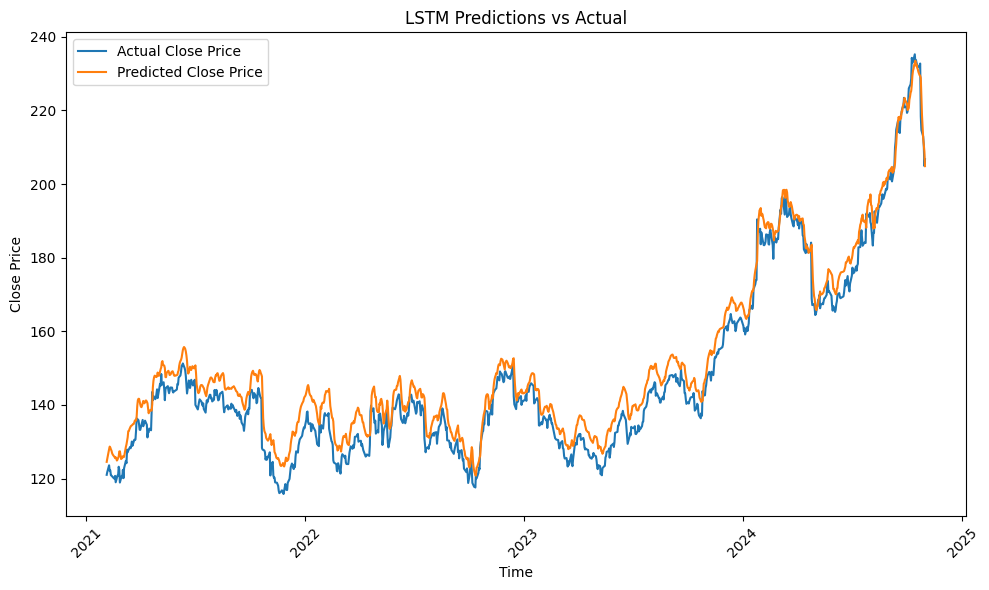

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test_diff, label='Actual Close Price')
plt.plot(dates,predictions_diff, label='Predicted Close Price')
# plt.plot(train_dates, train_values, label='Training Data', color='green')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')


plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

mse = mean_squared_error(y_test_diff, predictions_diff)
mae = mean_absolute_error(y_test_diff, predictions_diff)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
rmse = np.sqrt(mse)

mape = np.mean(np.abs((y_test_diff - predictions_diff) / y_test_diff)) * 100
mpe = np.mean((y_test_diff - predictions_diff) / y_test_diff) * 100


explained_variance = explained_variance_score(y_test_diff, predictions_diff)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")
print(f"Explained Variance: {explained_variance}")


Mean Squared Error: 25.788699691150526
Mean Absolute Error: 4.5915355940409635
Root Mean Squared Error (RMSE): 5.078257544783498
Mean Absolute Percentage Error (MAPE): 3.2687108109004335
Mean Percentage Error (MPE): -3.17235825086569
Explained Variance: 0.9897816550048575


## Fine tunning

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import Hyperband


def build_model(hp):
    model = Sequential()


    model.add(LSTM(
        units=hp.Int('units_1', min_value=64, max_value=256, step=64),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))


    model.add(LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(
        units=hp.Int('units_3', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='mean_squared_error'
    )

    return model


tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='hyperband_lstm',
    project_name='lstm_tuning'
)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 90 Complete [00h 01m 29s]
val_loss: 0.0007575713098049164

Best val_loss So Far: 0.000527164142113179
Total elapsed time: 00h 31m 55s


In [ ]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal hyperparameters:
- First LSTM units: {best_hps.get('units_1')}
- Second LSTM units: {best_hps.get('units_2')}
- Third LSTM units: {best_hps.get('units_3')}
- Dropout rates: {best_hps.get('dropout_1')}, {best_hps.get('dropout_2')}, {best_hps.get('dropout_3')}
- Learning rate: {best_hps.get('learning_rate')}
""")



The optimal hyperparameters:
- First LSTM units: 192
- Second LSTM units: 128
- Third LSTM units: 96
- Dropout rates: 0.2, 0.2, 0.30000000000000004
- Learning rate: 0.0005



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(LSTM(units=192, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(units=1))
model.compile(
        optimizer=Adam(
            learning_rate= 0.00005
        ),
        loss='mean_squared_error'
    )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 192)             │         153,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 192)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 96)                  │          86,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,449 (1.54 MB)

 Trainable params: 404,449 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0624 - val_loss: 0.0089
Epoch 2/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0038 - val_loss: 0.0082
Epoch 3/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0031 - val_loss: 0.0060
Epoch 4/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0078
Epoch 5/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 6/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 7/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 8/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 9/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 10/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 11/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 12/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9

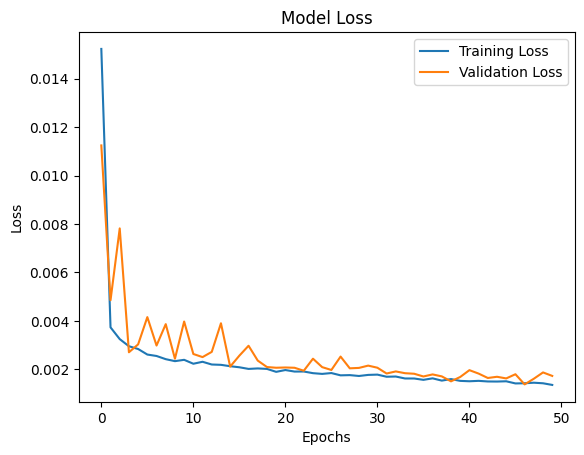

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
predictions_diff = scaler_close.inverse_transform(predictions)

In [ ]:
val_value = scaler_close.inverse_transform(y_val.reshape(-1, 1))
val_dates = ibm_cleaned['date'].iloc[-len(y_val):]

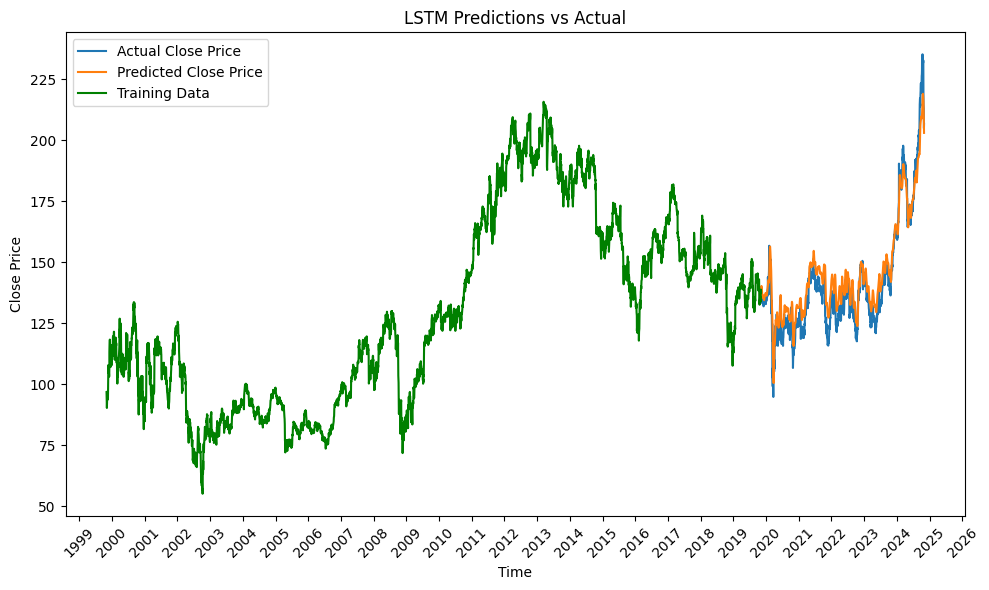

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test_diff, label='Actual Close Price')
plt.plot(dates,predictions_diff, label='Predicted Close Price')
plt.plot(val_dates,val_value,label='Training Data',color='green')
plt.plot(train_dates, train_values, label='Training Data', color='green')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')


plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

mse = mean_squared_error(y_test_diff, predictions_diff)
mae = mean_absolute_error(y_test_diff, predictions_diff)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
rmse = np.sqrt(mse)



mape = np.mean(np.abs((y_test_diff - predictions_diff) / y_test_diff)) * 100
mpe = np.mean((y_test_diff - predictions_diff) / y_test_diff) * 100

explained_variance = explained_variance_score(y_test_diff, predictions_diff)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")
print(f"Explained Variance: {explained_variance}")

Mean Squared Error: 44.70720510703347
Mean Absolute Error: 5.546566857762677
Root Mean Squared Error (RMSE): 6.686344674561241
Mean Absolute Percentage Error (MAPE): 4.052151311577959
Mean Percentage Error (MPE): -3.0280539010867398
Explained Variance: 0.9459520033266828


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


tscv = TimeSeriesSplit(n_splits=5, test_size=30)

for train_index, test_index in tscv.split(X):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]


    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')


    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))

    loss = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {loss}")


# Validation

In [ ]:
import requests
import pandas as pd
from datetime import datetime

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.8 MB/s eta 0:00:00


In [ ]:
### Get IBM stock price - set date from 11/1/2024 - 11/30/2024

key='GWQKZHTD2RXCTUDD'
url=f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey={key}&outputsize=full"
response=requests.get(url)
if response.status_code == 200:
  data=response.json()
  if "Time Series (Daily)" in data:
    time_series = data["Time Series (Daily)"]
    df = pd.DataFrame.from_dict(time_series, orient="index")
    df.columns = ["open", "high", "low", "close", "volume"]
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.apply(pd.to_numeric)
    full_date_range = pd.date_range(start='2024-11-01', end="2024-11-30", freq="D")  # set the date time
    df = df.reindex(full_date_range)
    stock_price = df["close"]
    df.to_csv('IBM.csv', index=True)
  else:
    print(f"Time Series data for IBM is missing or unavailable.")
print(stock_price)

2024-11-01    208.25
2024-11-02       NaN
2024-11-03       NaN
2024-11-04    206.32
2024-11-05    207.57
2024-11-06    213.60
2024-11-07    213.69
2024-11-08    213.72
2024-11-09       NaN
2024-11-10       NaN
2024-11-11    213.57
2024-11-12    210.86
2024-11-13    210.92
2024-11-14    208.99
2024-11-15    204.99
2024-11-16       NaN
2024-11-17       NaN
2024-11-18    208.09
2024-11-19    210.25
2024-11-20    214.60
2024-11-21    222.40
2024-11-22    222.97
2024-11-23       NaN
2024-11-24       NaN
2024-11-25    226.13
2024-11-26    228.83
2024-11-27    226.92
2024-11-28       NaN
2024-11-29    227.41
2024-11-30       NaN
Freq: D, Name: close, dtype: float64


In [ ]:
# Treasury_yield
key='GWQKZHTD2RXCTUDD'
url=f'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=daily&maturity=3month&apikey={key}'
r = requests.get(url)
data = r.json()
if 'data' in data:
    articles = data['data']
    df = pd.json_normalize(articles)
    df.index = pd.to_datetime(df['date'])
    df =df.sort_index()
    df.rename(columns={'value': 'treasury_yield'}, inplace=True)
    df = df.loc["2024-11-01":"2024-12-01"]
    treasury=df['treasury_yield']
    df.to_csv('TreasuryYield.csv', index=True)
else:
    print("No data found in the 'treasury' section.")
treasury= treasury.loc[stock_price.index.intersection(treasury.index)]
print(treasury)


2024-11-01    4.61
2024-11-04    4.65
2024-11-05    4.64
2024-11-06    4.64
2024-11-07    4.63
2024-11-08    4.63
2024-11-11       .
2024-11-12    4.63
2024-11-13     4.6
2024-11-14    4.61
2024-11-15     4.6
2024-11-18    4.63
2024-11-19    4.62
2024-11-20    4.62
2024-11-21    4.63
2024-11-22    4.63
2024-11-25    4.62
2024-11-26    4.61
2024-11-27     4.6
2024-11-28       .
2024-11-29    4.58
Name: treasury_yield, dtype: object


In [ ]:
# Download S&P 500  - Adj close
import yfinance as yf

sp500_tech = yf.download('^SP500-45', start="2024-11-01", end="2024-12-01")
sp500_tech = sp500_tech.sort_index()
sp500_tech = sp500_tech["Adj Close"]
sp500_tech

[*********************100%***********************]  1 of 1 completed


Ticker,^SP500-45
Date,
2024-11-01,4386.229980
2024-11-04,4381.109863
2024-11-05,4445.049805
2024-11-06,4557.229980
2024-11-07,4640.790039
2024-11-08,4624.870117
2024-11-11,4583.709961
2024-11-12,4604.410156
2024-11-13,4590.089844


In [ ]:
#interest_rate
key='GWQKZHTD2RXCTUDD'
url=f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=daily&apikey={key}'
r = requests.get(url)
data = r.json()
if 'data' in data:
    articles = data['data']
    df = pd.json_normalize(articles)
    df.index = pd.to_datetime(df['date'])
    df =df.sort_index()
    df.rename(columns={'value': 'interest_rate'}, inplace=True)
    interest_rate=df['interest_rate']
    df.to_csv('Interestrate.csv', index=True)
else:
    print("No data found in the 'interest' section.")
interest_rate=interest_rate.loc[stock_price.index.intersection(interest_rate.index)]
print(interest_rate)

2024-11-01    4.83
2024-11-02    4.83
2024-11-03    4.83
2024-11-04    4.83
2024-11-05    4.83
2024-11-06    4.83
2024-11-07    4.83
2024-11-08    4.58
2024-11-09    4.58
2024-11-10    4.58
2024-11-11    4.58
2024-11-12    4.58
2024-11-13    4.58
2024-11-14    4.58
2024-11-15    4.58
2024-11-16    4.58
2024-11-17    4.58
2024-11-18    4.58
2024-11-19    4.58
2024-11-20    4.58
2024-11-21    4.58
2024-11-22    4.58
2024-11-23    4.58
2024-11-24    4.58
2024-11-25    4.58
2024-11-26    4.58
2024-11-27    4.58
2024-11-28    4.58
2024-11-29    4.58
2024-11-30    4.58
Name: interest_rate, dtype: object


In [ ]:
stock_price.index = pd.to_datetime(stock_price.index)
treasury.index = pd.to_datetime(treasury.index)
sp500_tech.index = pd.to_datetime(sp500_tech.index)
interest_rate.index = pd.to_datetime(interest_rate.index)

In [ ]:
stock_price.index = stock_price.index.tz_localize(None)
treasury.index = treasury.index.tz_localize(None)
sp500_tech.index = sp500_tech.index.tz_localize(None)
interest_rate.index = interest_rate.index.tz_localize(None)


In [ ]:
treasury = pd.DataFrame(treasury)
interest_rate = pd.DataFrame(interest_rate)
sp500_tech = pd.DataFrame(sp500_tech)
stock_price = pd.DataFrame(stock_price)

In [ ]:
merged_data = stock_price.join([treasury, sp500_tech, interest_rate])
merged_data.to_csv('IBM.csv', index=True)
merged_data

,close,treasury_yield,^SP500-45,interest_rate
2024-11-01,208.25,4.61,4386.229980,4.83
2024-11-02,NaN,NaN,NaN,4.83
2024-11-03,NaN,NaN,NaN,4.83
2024-11-04,206.32,4.65,4381.109863,4.83
2024-11-05,207.57,4.64,4445.049805,4.83
2024-11-06,213.60,4.64,4557.229980,4.83
2024-11-07,213.69,4.63,4640.790039,4.83
2024-11-08,213.72,4.63,4624.870117,4.58
2024-11-09,NaN,NaN,NaN,4.58
2024-11-10,NaN,NaN,NaN,4.58


In [ ]:
merged_data = pd.read_csv('IBM.csv')

In [ ]:
ibm = merged_data.copy()

In [ ]:
ibm['treasury_yield'] = ibm['treasury_yield'].replace('.', pd.NA)
ibm['treasury_yield'] = pd.to_numeric(ibm['treasury_yield'], errors='coerce')
ibm['^SP500-45'] = pd.to_numeric(ibm['^SP500-45'], errors='coerce')

ibm['close'] = ibm['close'].interpolate(method='linear')
ibm['treasury_yield'] = ibm['treasury_yield'].interpolate(method='linear')
ibm['^SP500-45'] = ibm['^SP500-45'].interpolate(method='linear')
ibm['interest_rate'] = ibm['interest_rate'].interpolate(method='linear')

ibm_new = ibm.copy()

nan_summary_after_interpolation = ibm.isna().sum()
nan_summary_after_interpolation

,0
Unnamed: 0,0
close,0
treasury_yield,0
^SP500-45,0
interest_rate,0


In [ ]:

ibm_new = ibm_new.reset_index()
ibm_new = ibm_new.rename(columns={'index': 'date'})
print(ibm_new.head())

   date  Unnamed: 0       close  treasury_yield    ^SP500-45  interest_rate
0     0  2024-11-01  208.250000        4.610000  4386.229980           4.83
1     1  2024-11-02  207.606667        4.623333  4384.523275           4.83
2     2  2024-11-03  206.963333        4.636667  4382.816569           4.83
3     3  2024-11-04  206.320000        4.650000  4381.109863           4.83
4     4  2024-11-05  207.570000        4.640000  4445.049805           4.83


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['treasury_yield', '^SP500-45', 'interest_rate']


scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(ibm_new[columns_to_scale].dropna())

scaled_features_df = pd.DataFrame(scaled_features, columns=columns_to_scale)

scaled = pd.concat([ibm_new[['date']].reset_index(drop=True), scaled_features_df], axis=1)


scaled.to_csv('scaled_new.csv', index=False)

print(scaled.head())


   date  treasury_yield  ^SP500-45  interest_rate
0     0        0.428571   0.019717            1.0
1     1        0.619048   0.013145            1.0
2     2        0.809524   0.006572            1.0
3     3        1.000000   0.000000            1.0
4     4        0.857143   0.246226            1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['close']

scaler_close = MinMaxScaler()

scaled_features = scaler_close.fit_transform(ibm_new[columns_to_scale].dropna())

scaled['close'] = scaled_features
scaled.to_csv('scaled.csv', index=False)

print(scaled.head())

   date  treasury_yield  ^SP500-45  interest_rate     close
0     0        0.428571   0.019717            1.0  0.136745
1     1        0.619048   0.013145            1.0  0.109760
2     2        0.809524   0.006572            1.0  0.082774
3     3        1.000000   0.000000            1.0  0.055789
4     4        0.857143   0.246226            1.0  0.108221


In [ ]:
selected_features = ['treasury_yield','^SP500-45','interest_rate', 'close']
data_values = scaled[selected_features].values

def create_dataset(data, time_steps):

    X, y = [], []
    for i in range(time_steps, len(data)):

        X.append(data[i-time_steps:i])
    return np.array(X)



target_col_index = selected_features.index('close')
time_steps = 1

X_new = create_dataset(data_values, time_steps=time_steps)


In [ ]:
predictions_scaled = model.predict(X_new)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


In [ ]:
predictions_scaled = scaler_close.inverse_transform(predictions_scaled)

In [ ]:
predictions_scaled

array([[207.40933],
       [207.40245],
       [207.39586],
       [207.3896 ],
       [207.38606],
       [207.37032],
       [207.36491],
       [207.39795],
       [207.39966],
       [207.40135],
       [207.40306],
       [207.40167],
       [207.41801],
       [207.4135 ],
       [207.43553],
       [207.42935],
       [207.42337],
       [207.41757],
       [207.41446],
       [207.41388],
       [207.40265],
       [207.40363],
       [207.40549],
       [207.40738],
       [207.40932],
       [207.40897],
       [207.42186],
       [207.42441],
       [207.42705]], dtype=float32)

In [ ]:
y_test = ibm_new['close'].values

In [ ]:
y_test = y_test[time_steps:]

In [ ]:
dates = ibm_new['date'].values

In [ ]:
dates = dates[time_steps:]

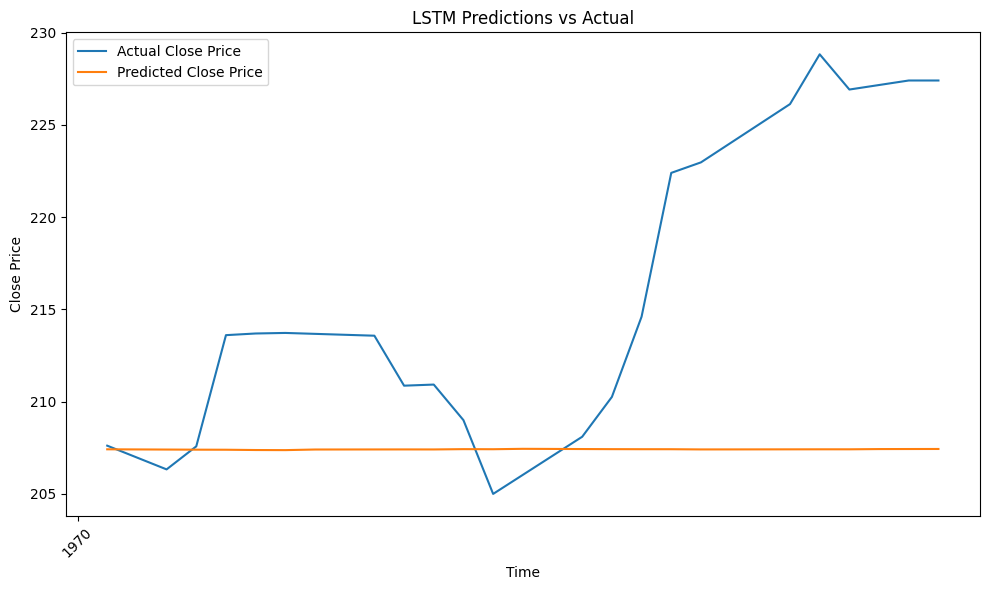

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test, label='Actual Close Price')
plt.plot(dates,predictions_scaled, label='Predicted Close Price')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')


plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions_scaled)
mae = mean_absolute_error(y_test, predictions_scaled)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 129.83991716031775
Mean Absolute Error: 8.52045067798132


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

tscv = TimeSeriesSplit(n_splits=5, test_size=30)

for train_index, test_index in tscv.split(X):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))

    # 验证性能
    loss = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {loss}")


Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.0281 - val_loss: 6.4744e-04
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0035 - val_loss: 5.6955e-04
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - val_loss: 1.8257e-04
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0029 - val_loss: 9.6819e-04
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0026 - val_loss: 1.3434e-04
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 10/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0023 - val_loss: 4.3130e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3130e-04
Validation Loss: 0.0004312974342610687
Epoch 1/10
281/

In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {i+1}:")
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    print("Train data:", X[train_index].flatten())
    print("Test data:", X[test_index].flatten())
    print("-" * 50)

Fold 1:
Train indices: [   0    1    2 ... 8949 8950 8951]
Test indices: [8952 8953 8954 8955 8956 8957 8958 8959 8960 8961 8962 8963 8964 8965
 8966 8967 8968 8969 8970 8971 8972 8973 8974 8975 8976 8977 8978 8979
 8980 8981]
Train data: [ 0.25931687  0.80373832  0.33277266 ...  0.71484016  0.70050707
 -0.01433309]
Test data: [0.70038781 0.84890966 2.76678662 ... 0.72547947 0.73767086 0.01219139]
--------------------------------------------------
Fold 2:
Train indices: [   0    1    2 ... 8979 8980 8981]
Test indices: [8982 8983 8984 8985 8986 8987 8988 8989 8990 8991 8992 8993 8994 8995
 8996 8997 8998 8999 9000 9001 9002 9003 9004 9005 9006 9007 9008 9009
 9010 9011]
Train data: [0.25931687 0.80373832 0.33277266 ... 0.72547947 0.73767086 0.01219139]
Test data: [0.68898152 0.85981308 2.96359766 ... 0.80422    0.84335933 0.03913933]
--------------------------------------------------
Fold 3:
Train indices: [   0    1    2 ... 9009 9010 9011]
Test indices: [9012 9013 9014 9015 9016 9017